### 10. This question should be answered using the Carseats data set.

### a) Fit a multiple regression model to predict Sales using Price, Urban, and US.

In [26]:
from ISLP import load_data
carseats = load_data('Carseats')

In [30]:
import pandas as pd
df = pd.DataFrame(carseats)
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [31]:
# need to convert urban to dummies as well as US
df = pd.get_dummies(df, columns=['Urban', 'US'], drop_first=True)
df['Urban_Yes'] = df['Urban_Yes'].astype(int)
df['US_Yes'] = df['US_Yes'].astype(int)

In [32]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,Bad,42,17,1,1
1,11.22,111,48,16,260,83,Good,65,10,1,1
2,10.06,113,35,10,269,80,Medium,59,12,1,1
3,7.40,117,100,4,466,97,Medium,55,14,1,1
4,4.15,141,64,3,340,128,Bad,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,1,1
396,6.14,139,23,3,37,120,Medium,55,11,0,1
397,7.41,162,26,12,368,159,Medium,40,18,1,1
398,5.94,100,79,7,284,95,Bad,50,12,1,1


In [37]:
import statsmodels.formula.api as smf

model = smf.ols("Sales ~ Price + Urban_Yes + US_Yes ", data=df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Wed, 06 Aug 2025   Prob (F-statistic):           2.39e-23
Time:                        14:42:51   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0435      0.651     20.036      0.0

### (b) Provide an interpretation of each coefficient in the model. Be careful—some of the variables in the model are qualitative!

In [39]:
# coefficenets tell us that lower carseat price, as well as lower urban places have higher sales
# and that if they are in the US it will have higher sales

### (c) Write out the model in equation form, being careful to handle the qualitative variables properly.

In [40]:
# Sales = 13.0435 + (-0.0545) * Price + (-0.0219) * Urban( 1 for Urban , 0 for not) + (1.2006) * US (1 for yes
# 0 for no) 

### (d) For which of the predictors can you reject the null hypothesis H0 :βj =0?

In [41]:
# We can reject the null hypothesis for the Price as the p-value is statistically significant along with 
# a t statistic along with if the carseat was made in th US

### (e) On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

In [54]:
import statsmodels.api as sm
X = df[['Price', 'US_Yes']]
X = sm.add_constant(X)
y = df['Sales']
results_1 = sm.OLS(y, X).fit()


### (f) How well do the models in (a) and (e) fit the data?

In [55]:
# They both fit the model the same with the adj R^2 being higher in the second model

### (g) Using the model from (e), obtain 95% confidence intervals for the coefficient(s).

In [56]:
# Get 95% confidence intervals for all coefficients
conf_int = results_1.conf_int(alpha=0.05)
print(conf_int)

               0          1
const   11.79032  14.271265
Price   -0.06476  -0.044195
US_Yes   0.69152   1.707766


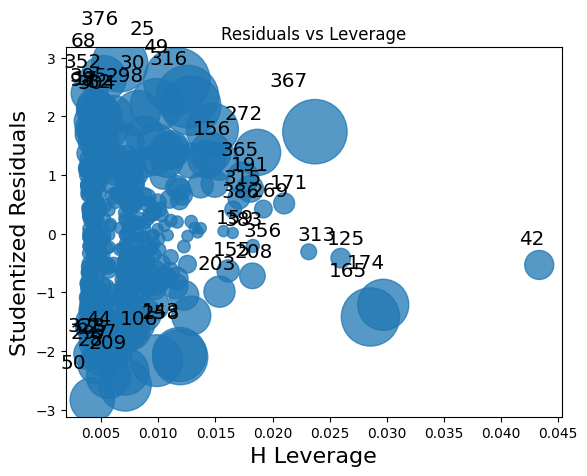

In [57]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
sm.graphics.influence_plot(results_1)
plt.title("Residuals vs Leverage")
plt.show()

In [51]:
# There does seem to be high leverage points in this thing